# determine the cuts to NASA-Sloan Atlas observations

In [1]:
import os
import h5py 
import numpy as np

In [2]:
from astropy.table import Table

In [3]:
import corner as DFM
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
dat_dir = '/tigress/chhahn/goleta/'

nsa = Table.read(os.path.join(dat_dir, 'nsa_v0_1_2.fits'))
absmag_nsa = np.array(nsa['ABSMAG'].data)[:,2:] # u, g, r, i, z
ivar_absmag_nsa = np.array(nsa['AMIVAR'].data)[:,2:]

cuts = (nsa['Z'] < 0.05)

In [5]:
mag_sig = np.concatenate([absmag_nsa, ivar_absmag_nsa**-0.5], axis=1)
mag_sig = mag_sig[np.all(np.isfinite(mag_sig), axis=1) & cuts]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


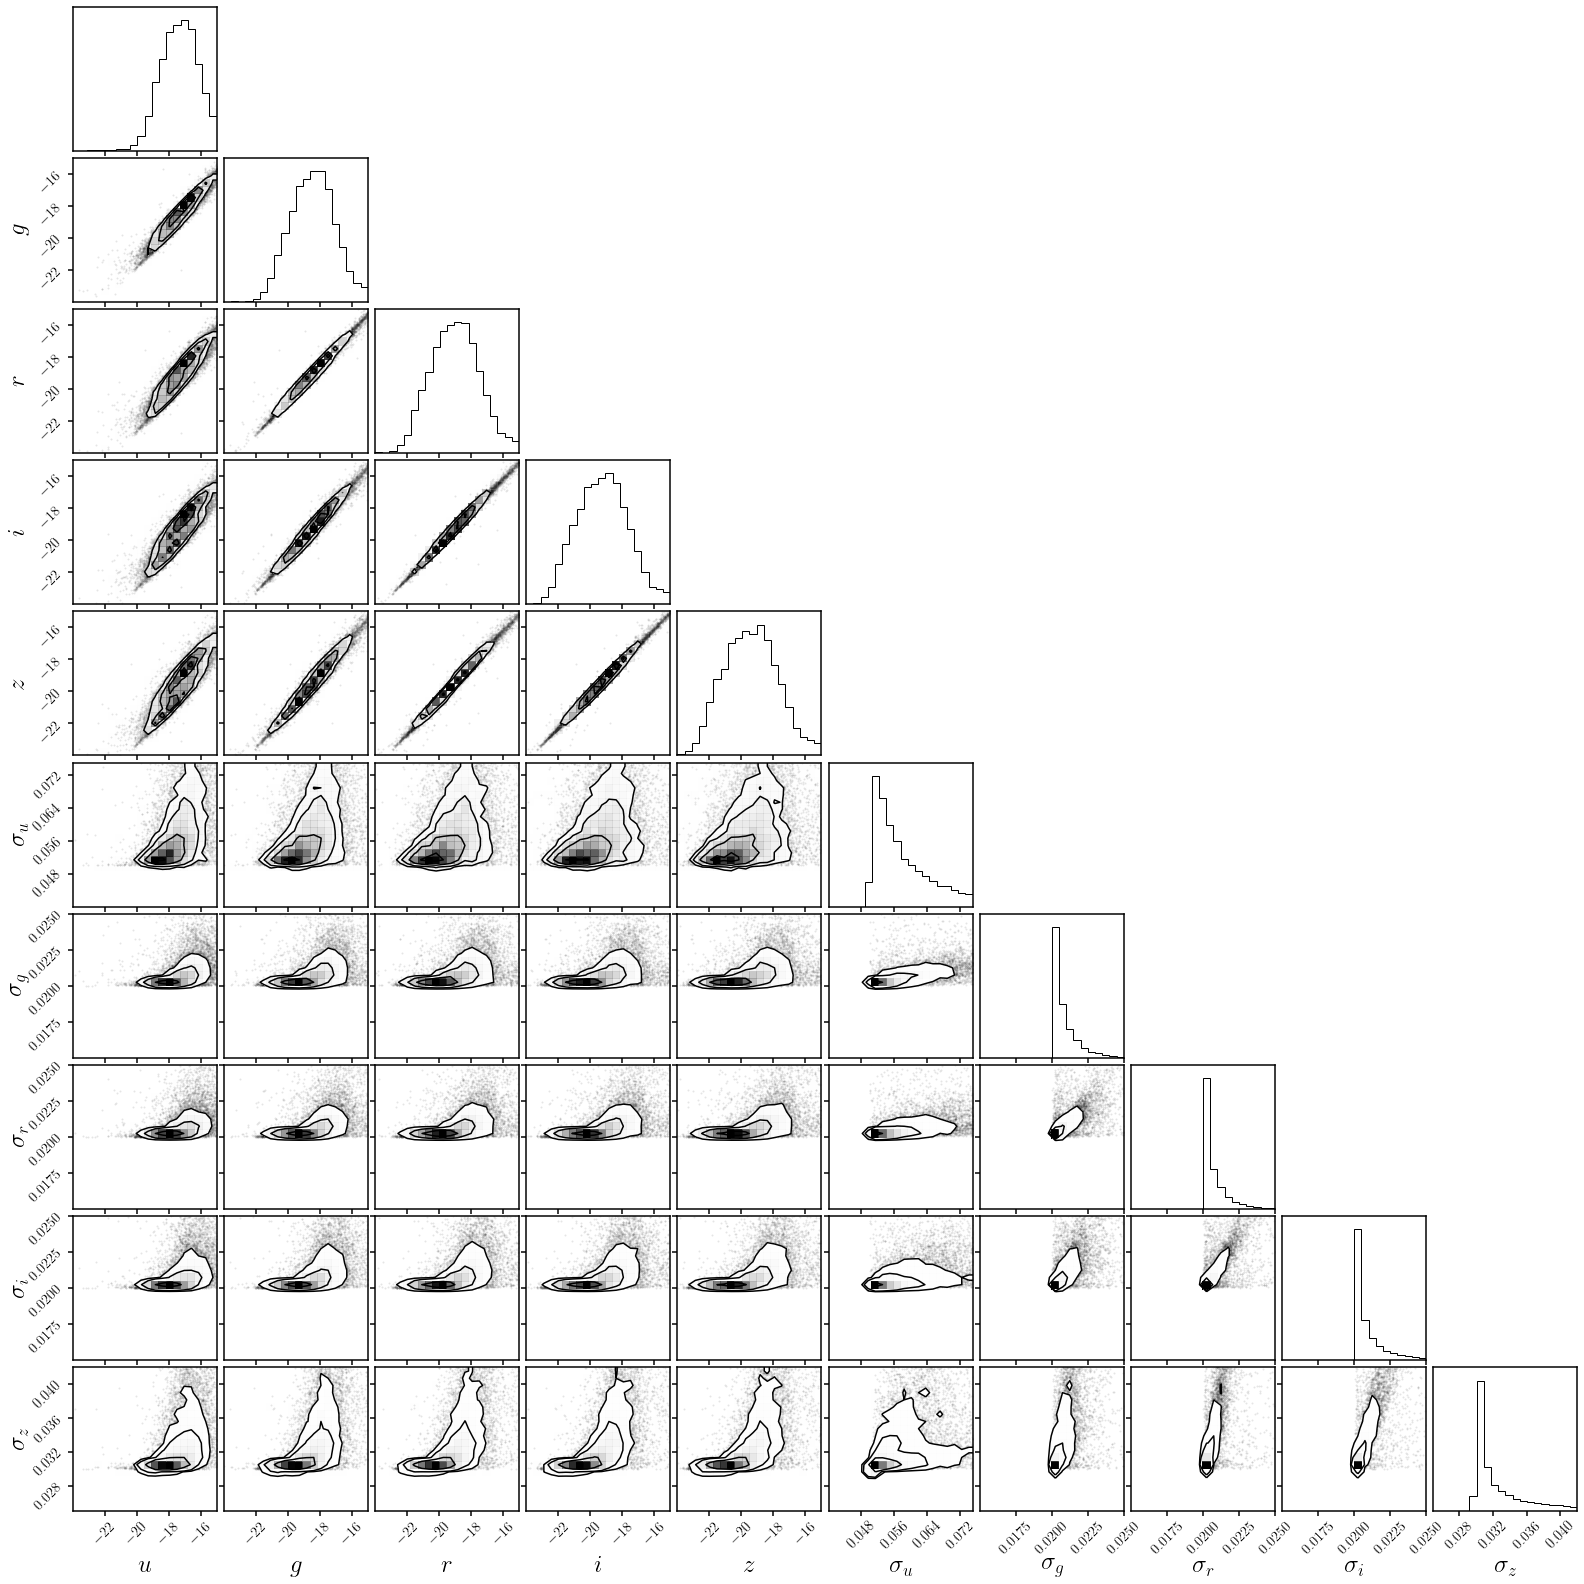

In [6]:
fig = DFM.corner(mag_sig[::10], color='k', hist_kwargs={'density': True},
               range=[(-24, -15), (-24, -15), (-24, -15), (-24, -15), (-24, -15),
                      (0.04, 0.075), (0.015, 0.025), (0.015, 0.025), (0.015, 0.025), (0.025, 0.042)],
               labels=[r'$%s$' % b for b in ['u', 'g', 'r', 'i', 'z']] + [r'$\sigma_u$', r'$\sigma_g$', r'$\sigma_r$', r'$\sigma_i$', r'$\sigma_z$'],
               label_kwargs={'fontsize': 25})

# absolute magnitude cuts

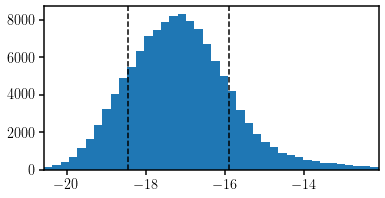

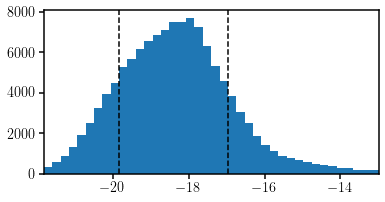

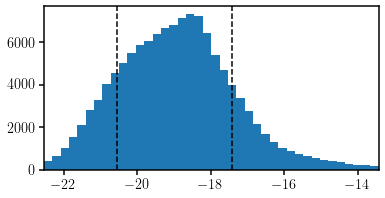

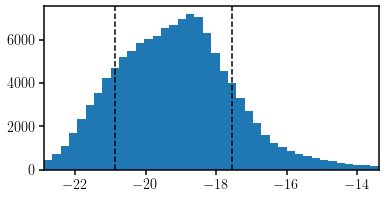

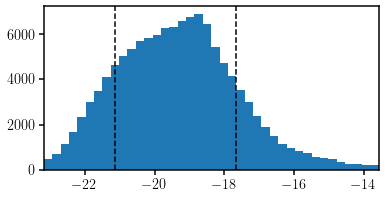

In [7]:
for i in range(5): 
    fig = plt.figure(figsize=(6,3))
    sub = fig.add_subplot(111)
    _ = sub.hist(mag_sig[:,i], range=np.quantile(mag_sig[:,i], (0.005, 0.995)), bins=40)
    
    sub.axvline(np.quantile(mag_sig[:,i], (0.16)), color='k', linestyle='--')            
    sub.axvline(np.quantile(mag_sig[:,i], (0.84)), color='k', linestyle='--')            
    sub.set_xlim(np.quantile(mag_sig[:,i], (0.005, 0.995)))
    plt.show()

In [8]:
for i in range(5): 
    print(np.quantile(mag_sig[:,i], (0.16, 0.84)))

[-18.45909119 -15.91413784]
[-19.84108124 -16.97441597]
[-20.55057068 -17.42314644]
[-20.89248276 -17.57057419]
[-21.14808121 -17.68198929]


# uncertainty cuts

0.050000392 0.08217523247003555


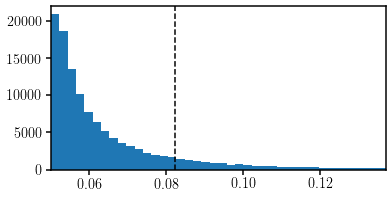

0.020000303 0.022027989104390144


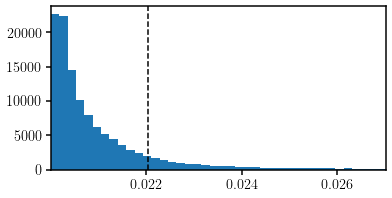

0.020000089 0.021790371090173722


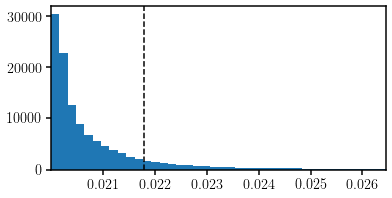

0.02000019 0.022792361676692963


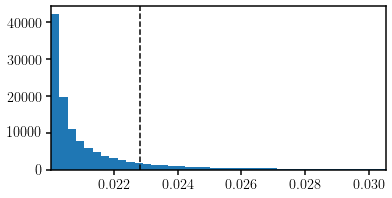

0.030000037 0.04429797306656838


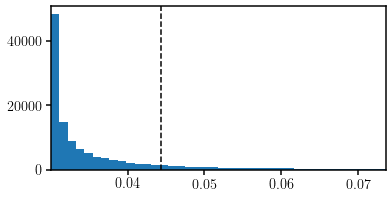

In [9]:
for i in range(5): 
    print(mag_sig[:,i+5].min(), np.quantile(mag_sig[:,i+5], 0.84))

    fig = plt.figure(figsize=(6,3))
    sub = fig.add_subplot(111)
    _ = sub.hist(mag_sig[:,i+5], range=np.quantile(mag_sig[:,i+5], (0.0, 0.95)), bins=40)
    
    sub.axvline(np.quantile(mag_sig[:,i+5], (0.84)), color='k', linestyle='--')            
    sub.set_xlim(mag_sig[:,i+5].min(), np.quantile(mag_sig[:,i+5], (0.95)))
    plt.show()

In [10]:
for i in range(5): 
    print(mag_sig[:,i+5].min(), np.quantile(mag_sig[:,i+5], 0.84))

0.050000392 0.08217523247003555
0.020000303 0.022027989104390144
0.020000089 0.021790371090173722
0.02000019 0.022792361676692963
0.030000037 0.04429797306656838


# color cuts

In [11]:
colors_nsa = np.array([mag_sig[:,0] - mag_sig[:,1],
                       mag_sig[:,0] - mag_sig[:,2],
                       mag_sig[:,0] - mag_sig[:,3],
                       mag_sig[:,0] - mag_sig[:,4],
                       mag_sig[:,1] - mag_sig[:,2],
                       mag_sig[:,1] - mag_sig[:,3],
                       mag_sig[:,1] - mag_sig[:,4],
                       mag_sig[:,2] - mag_sig[:,3], 
                       mag_sig[:,2] - mag_sig[:,4], 
                       mag_sig[:,3] - mag_sig[:,4]]).T

u - g
[0.83526917 1.65994911]


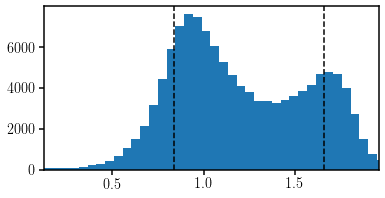

u - r
[1.2023571  2.44489975]


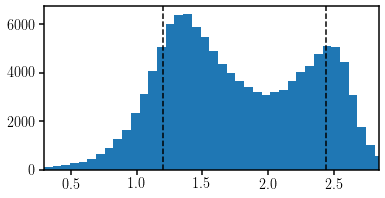

u - i
[1.32402687 2.81119499]


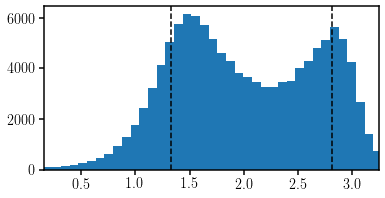

u - z
[1.4199707  3.07203979]


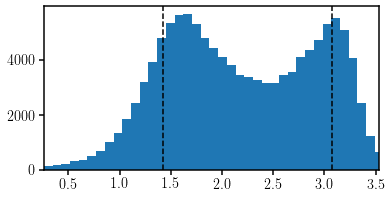

g - r
[0.36573906 0.78486214]


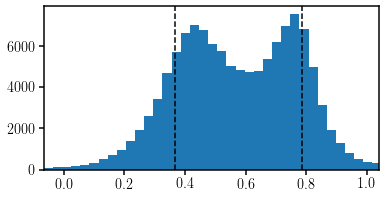

g - i
[0.48411102 1.15360222]


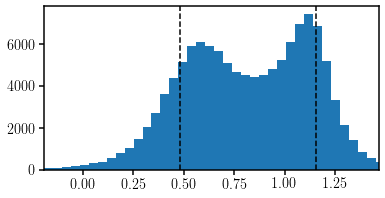

g - z
[0.57762604 1.42101784]


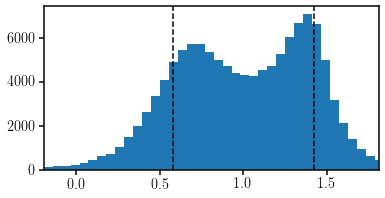

r - i
[0.10895805 0.37660789]


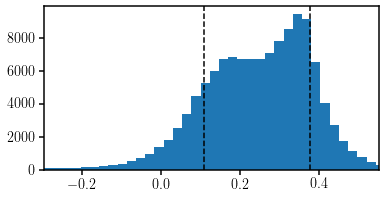

r - z
[0.20123711 0.64795876]


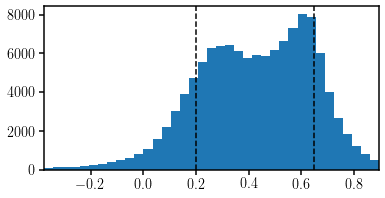

i - z
[0.07415848 0.28819122]


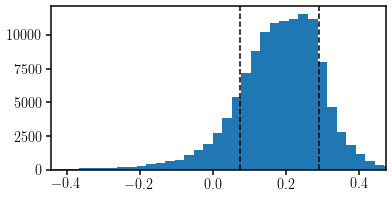

In [12]:
for i in range(5): 
    for j in range(5): 
        if i < j: 
            print('%s - %s' % (['u', 'g', 'r', 'i', 'z'][i], ['u', 'g', 'r', 'i', 'z'][j]))
            color = mag_sig[:,i] - mag_sig[:,j]
            print(np.quantile(color, (0.16, 0.84)))
            
            fig = plt.figure(figsize=(6,3))
            sub = fig.add_subplot(111)
            _ = sub.hist(color, range=np.quantile(color, (0.005, 0.995)), bins=40)
            sub.axvline(np.quantile(color, (0.16)), color='k', linestyle='--')
            sub.axvline(np.quantile(color, (0.84)), color='k', linestyle='--')            
            sub.set_xlim(np.quantile(color, (0.005, 0.99)))
            plt.show()

In [13]:
for i in range(5): 
    for j in range(5): 
        if i < j: 
            #print('%s - %s' % (['u', 'g', 'r', 'i', 'z'][i], ['u', 'g', 'r', 'i', 'z'][j]))
            color = mag_sig[:,i] - mag_sig[:,j]
            print(np.quantile(color, (0.16, 0.84)))

[0.83526917 1.65994911]
[1.2023571  2.44489975]
[1.32402687 2.81119499]
[1.4199707  3.07203979]
[0.36573906 0.78486214]
[0.48411102 1.15360222]
[0.57762604 1.42101784]
[0.10895805 0.37660789]
[0.20123711 0.64795876]
[0.07415848 0.28819122]


# compare sample with full NSA

In [14]:
from goleta import data as Data

In [15]:
Xs = Data.get_obs()

23207 observed galaxies


/home/chhahn/projects/goleta/src/goleta/data.py:136: RuntimeWarning: divide by zero encountered in power
  sigmag_nsa = ivar_absmag_nsa**-0.5


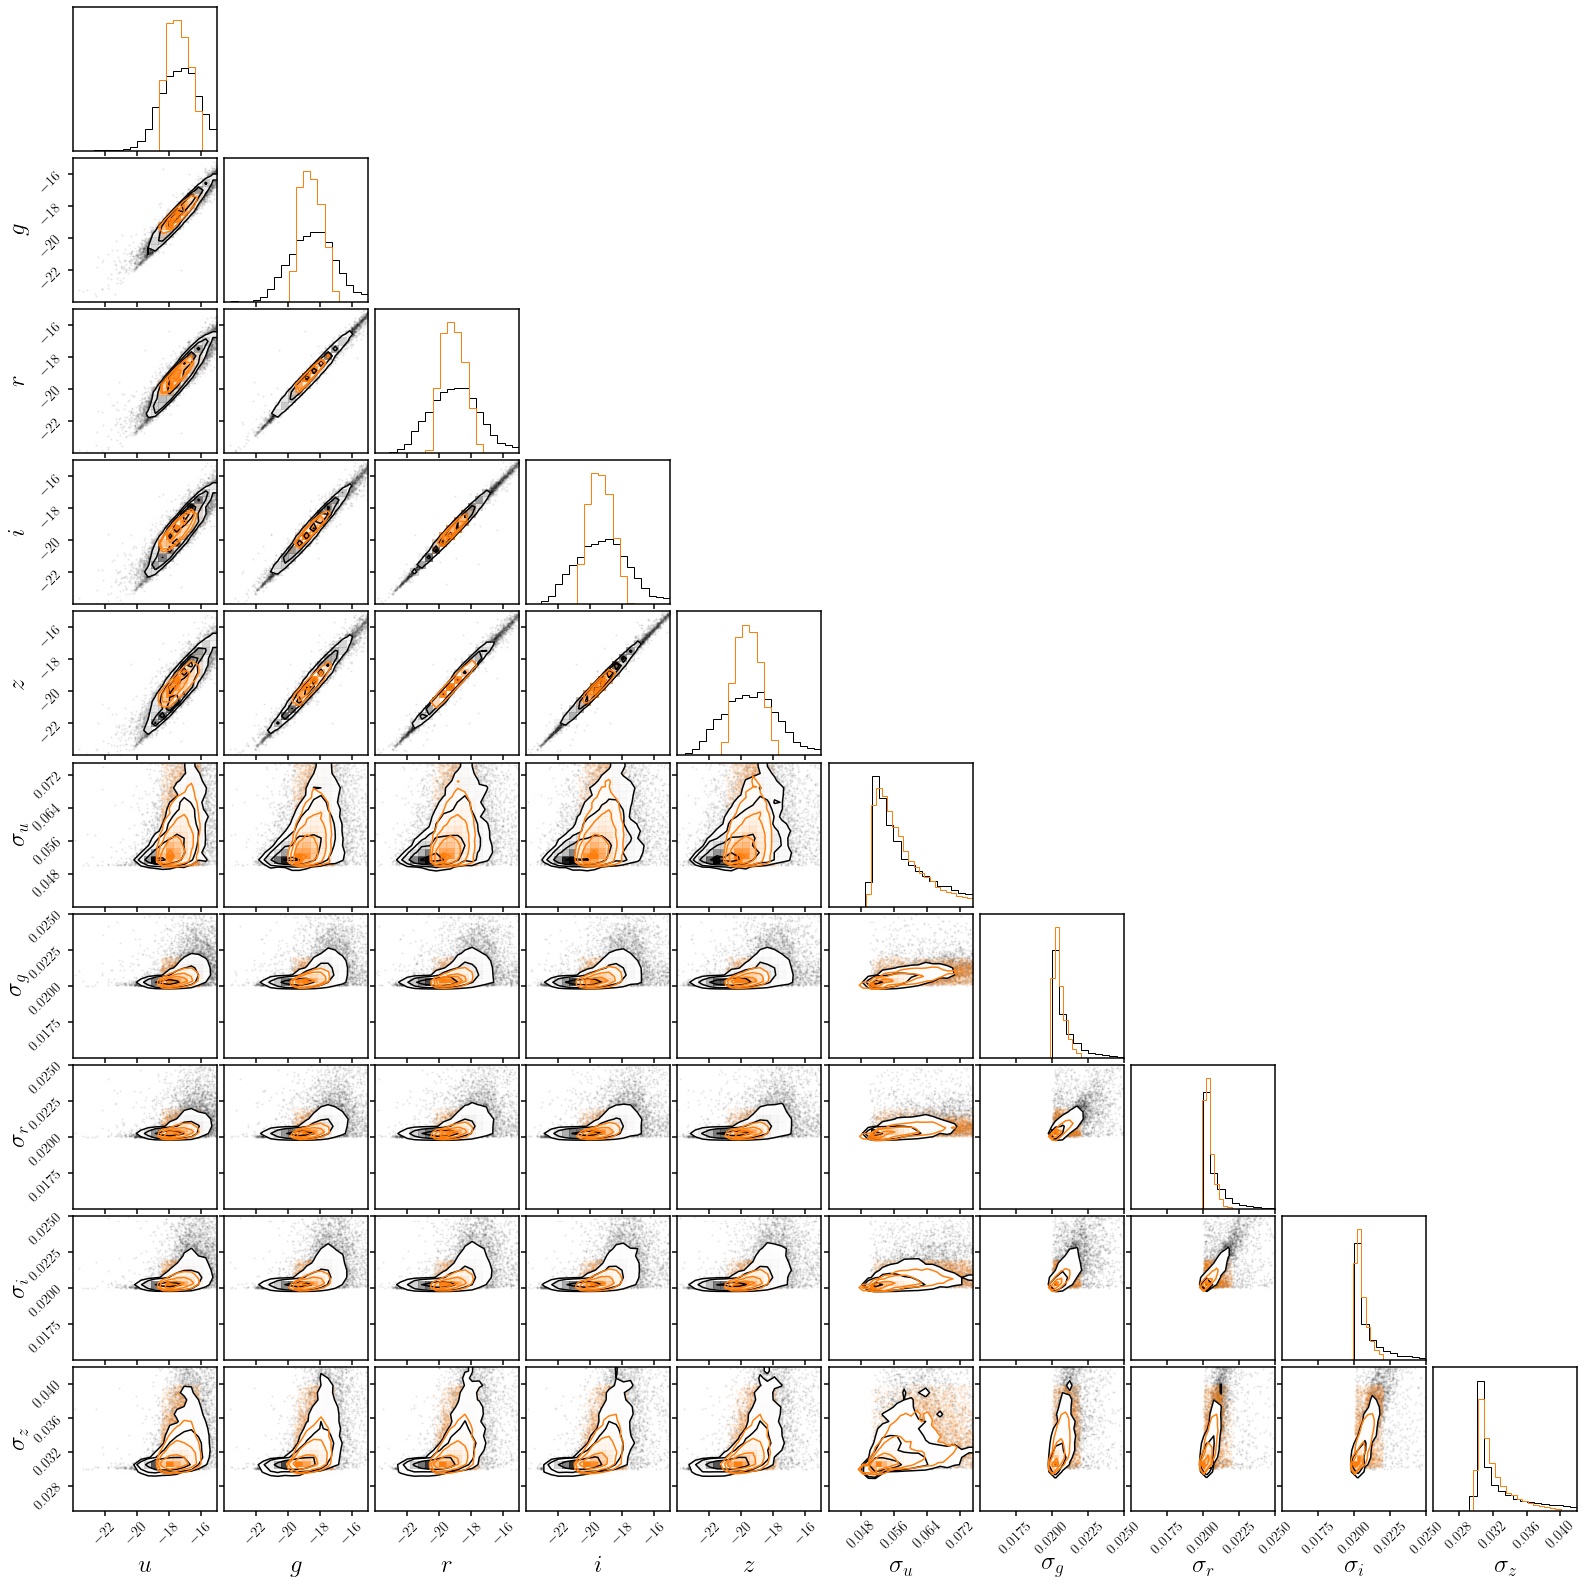

In [18]:
fig = DFM.corner(mag_sig[::10], color='k', hist_kwargs={'density': True},
               range=[(-24, -15), (-24, -15), (-24, -15), (-24, -15), (-24, -15),
                      (0.04, 0.075), (0.015, 0.025), (0.015, 0.025), (0.015, 0.025), (0.025, 0.042)],
               labels=[r'$%s$' % b for b in ['u', 'g', 'r', 'i', 'z']] + [r'$\sigma_u$', r'$\sigma_g$', r'$\sigma_r$', r'$\sigma_i$', r'$\sigma_z$'],
               label_kwargs={'fontsize': 25})
_ = DFM.corner(Xs, color='C1', hist_kwargs={'density': True},
               range=[(-24, -15), (-24, -15), (-24, -15), (-24, -15), (-24, -15),
                      (0.049, 0.075), (0.019, 0.025), (0.019, 0.025), (0.019, 0.025), (0.029, 0.042)],
               labels=[r'$%s$' % b for b in ['u', 'g', 'r', 'i', 'z']] + [r'$\sigma_u$', r'$\sigma_g$', r'$\sigma_r$', r'$\sigma_i$', r'$\sigma_z$'],
               label_kwargs={'fontsize': 25}, fig=fig)
